# #Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv

In [1]:
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')

In [2]:

df=pd.read_csv("Customer_Churn_ Analysis.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
#checking the 1st 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#checking the last 5 rows
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
df.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2840,7299-GNVPL,Female,0,Yes,Yes,23,Yes,No,Fiber optic,Yes,...,No,Yes,No,No,Month-to-month,No,Mailed check,84.4,1936.85,No


Data Descriptive Analysis

In [6]:
df.shape

(7043, 21)

Observations: The dataset has 7043 rows & 21 columns

In [7]:
#checking for nature of datatypes
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Observation: Except SeniorCitizen(integer), tenure (integer) and MonthlyCharges (float) all other columns are object. We need to convert TotalCharges column as its showing as object but it has float data inside it.

In [8]:
#Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
#Checking data description for all numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [84]:
#Checking data description for all non-numerical columns

df_str=df[['customerID','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','TotalCharges','Churn']]
df_str.describe().T

,count,mean,std,min,25%,50%,75%,max
customerID,7043.0,3521.000000,2033.283305,0.0,1760.500,3521.00,5281.5,7042.0
gender,7043.0,0.504756,0.500013,0.0,0.000,1.00,1.0,1.0
Partner,7043.0,0.483033,0.499748,0.0,0.000,0.00,1.0,1.0
Dependents,7043.0,0.299588,0.458110,0.0,0.000,0.00,1.0,1.0
PhoneService,7043.0,0.903166,0.295752,0.0,1.000,1.00,1.0,1.0
MultipleLines,7043.0,0.940508,0.948554,0.0,0.000,1.00,2.0,2.0
InternetService,7043.0,0.872923,0.737796,0.0,0.000,1.00,1.0,2.0
OnlineSecurity,7043.0,0.790004,0.859848,0.0,0.000,1.00,2.0,2.0
OnlineBackup,7043.0,0.906432,0.880162,0.0,0.000,1.00,2.0,2.0
DeviceProtection,7043.0,0.904444,0.879949,0.0,0.000,1.00,2.0,2.0


In [86]:
# Columns of the dataset
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
# TotalCharges column though has float data it is showing object type data
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [12]:
df['TotalCharges'].nunique()

6531

In [13]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Observation: The dataset contains details of customers.

In [15]:
df.loc[df['TotalCharges']== " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In 11 rows there are empty spaces in TotalCharges column. We will replace this with null values.

In [16]:
df['TotalCharges']=df['TotalCharges'].replace(" ", np.nan)

In [17]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
#converting TotalCharges into float

df['TotalCharges']=df['TotalCharges'].astype(float)

In [19]:
df.TotalCharges.dtypes

dtype('float64')

In [20]:
# now we can fill the null values in TotalCharges

TotalCharges_mean=df['TotalCharges'].mean()
TotalCharges_mean

2283.3004408418697

In [21]:
df['TotalCharges'].fillna(value= TotalCharges_mean, inplace=True)

In [22]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Visualization of the Data

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Male      3555
Female    3488
Name: gender, dtype: int64


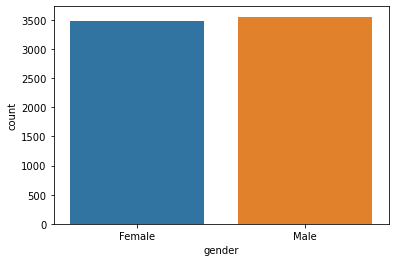

In [24]:
sns.countplot(x = "gender", data = df )
print(df['gender'].value_counts())

Observation: The number of males are slightly higher than females. Number of males is 3555 and number of females is 3488.
    
    

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


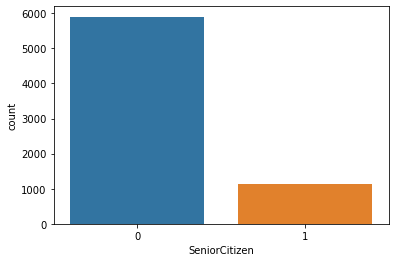

In [25]:
sns.countplot(x = "SeniorCitizen", data = df )
print(df['SeniorCitizen'].value_counts())

Observation: The number of young customers is 5901 & senior customers is 1142

No     3641
Yes    3402
Name: Partner, dtype: int64


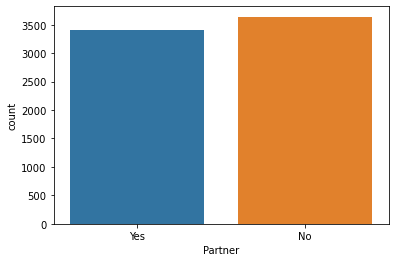

In [26]:
 sns.countplot(x = "Partner", data = df )
print(df['Partner'].value_counts())

Observation: Thetotal number of married customer is 3402 & unmaaried customer is 3641

No     4933
Yes    2110
Name: Dependents, dtype: int64


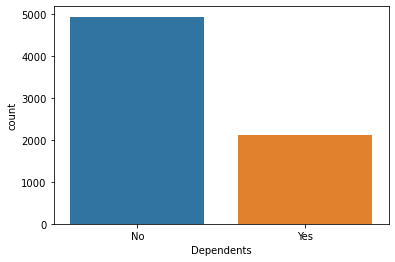

In [27]:
 sns.countplot(x = "Dependents", data = df )
print(df['Dependents'].value_counts())

Observation: The total number of Dependent customers is 2110 & independent customer is 4933.

Yes    6361
No      682
Name: PhoneService, dtype: int64


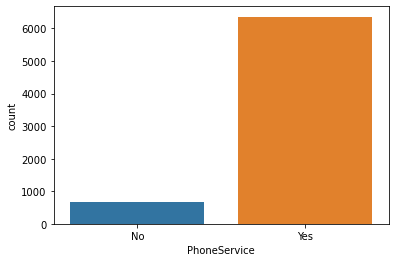

In [28]:
 sns.countplot(x = "PhoneService", data = df )
print(df['PhoneService'].value_counts())

Observation: The total number of customer using PhoneService is 6361 & not using PhoneService is 682.

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


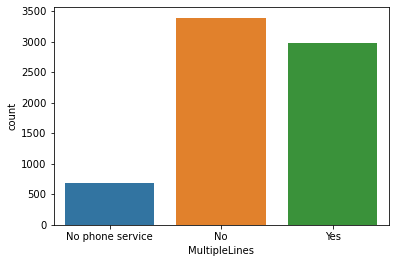

In [29]:
sns.countplot(x='MultipleLines', data = df)
print(df['MultipleLines'].value_counts())

Observation: Customers with multiple lines us 2971 & without MultipleLines is 3390. Customers without phone service is 682.

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


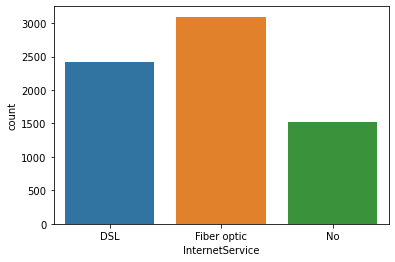

In [30]:
sns.countplot(x='InternetService', data = df)
print(df['InternetService'].value_counts())

Observation:Customers using Fiber optic is 3096, DSL 2421 & none of these is 1526

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


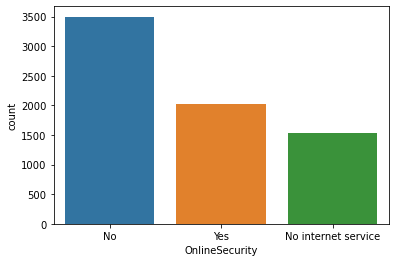

In [31]:
sns.countplot(x='OnlineSecurity', data = df)
print(df['OnlineSecurity'].value_counts())

Observation:Customers not having internet services is 1526, not using internet services is 3498 & using internet services is 2019.

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


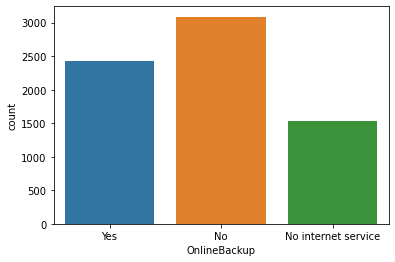

In [32]:
sns.countplot(x='OnlineBackup', data = df)
print(df['OnlineBackup'].value_counts())

Observation: Customers not using  internet service  is  1526.those using internet service is 2429 & not using internet service is 3088


No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


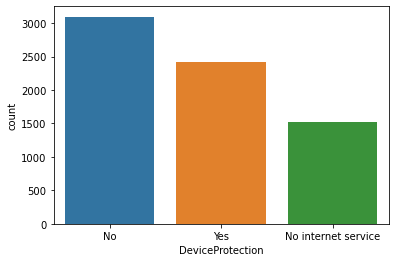

In [33]:
sns.countplot(x='DeviceProtection', data = df)
print(df['DeviceProtection'].value_counts())

Observation: Customers not using  internet service  is  1526.those using DeviceProtection is 2422 & not using DeviceProtection is 3095.

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


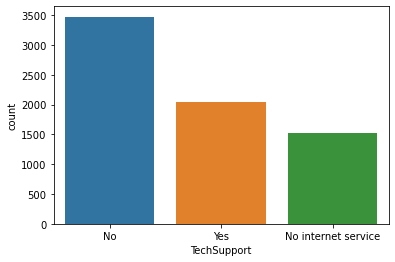

In [34]:
sns.countplot(x='TechSupport', data = df)
print(df['TechSupport'].value_counts())

Observation: Customers not using internet service is 1526.those using TechSupport is 2044 & not using TechSupport is 3473.

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


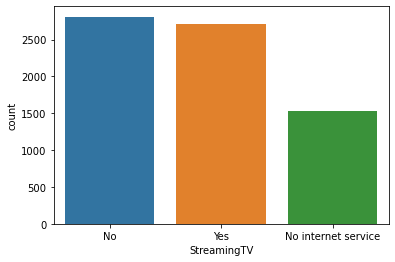

In [35]:
sns.countplot(x='StreamingTV', data = df)
print(df['StreamingTV'].value_counts())

Observation: Customers not using internet service is 1526.those using StreamingTV is 2707 & not using StreamingTV is 2810.

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


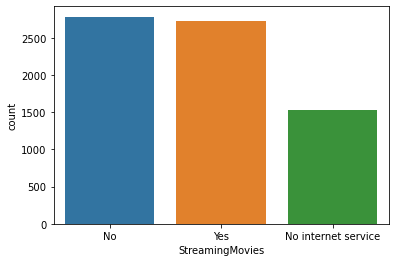

In [36]:
sns.countplot(x='StreamingMovies', data = df)
print(df['StreamingMovies'].value_counts())

Observation: Customers not using internet service is 1526.those using StreamingMovies is 2732 & not using StreamingMovies is 2785.

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


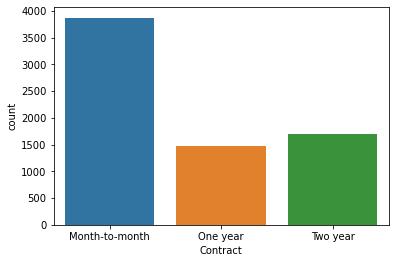

In [37]:
sns.countplot(x='Contract', data = df)
print(df['Contract'].value_counts())

Observation: Customers who are on Month-to-month contract is 3875, those on Two year contract is 1695 & One year contrcat is 1473.

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


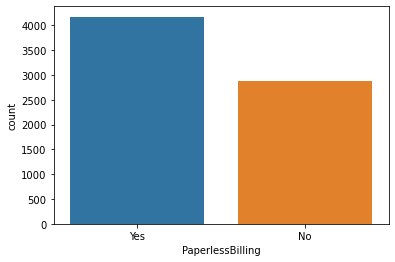

In [38]:
sns.countplot(x='PaperlessBilling', data = df)
print(df['PaperlessBilling'].value_counts())

Observation: Customers who opted for paperless billing is  4171 & those not opted for paper less billing is 2872. 

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

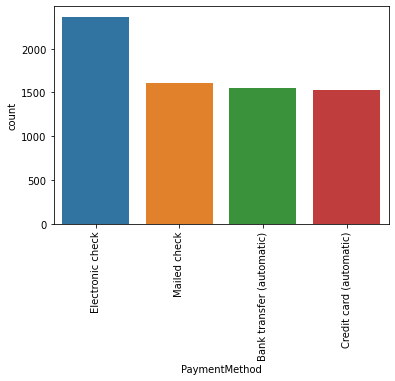

In [39]:
sns.countplot(x='PaymentMethod', data = df)
print(df['PaymentMethod'].value_counts())
plt.xticks(rotation=90)

Observation: Most of the customers use Electronic check (2365) for payment, (1612) use Mailed check, Bank transfer (automatic) by (1544)
& Credit card (automatic) by 1522 of the customers.             

No     5174
Yes    1869
Name: Churn, dtype: int64


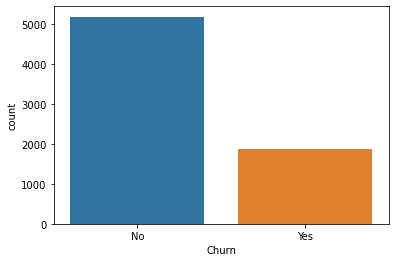

In [40]:
sns.countplot(x='Churn', data = df)
print(df['Churn'].value_counts())


<AxesSubplot:xlabel='tenure', ylabel='SeniorCitizen'>

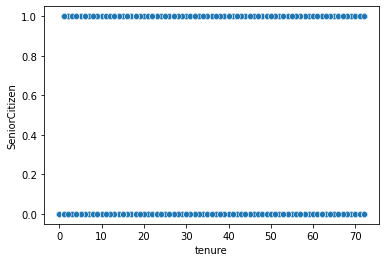

In [41]:
sns.scatterplot(y= "SeniorCitizen", x= "tenure", data = df)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

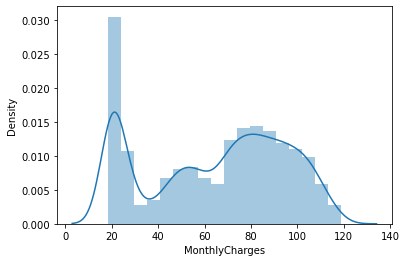

In [42]:
sns.distplot(df['MonthlyCharges'],kde=True)

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

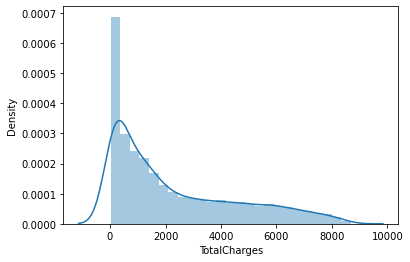

In [43]:
sns.distplot(df['TotalCharges'],kde=True)

Observation: Both these columns dont follow a normal distribution.

Encoding

We cannot perform Exploratory Data Analysis on Non-numerical Data, so we have to first of all convert them to numerical data Here we shall adopt Ordinal Encoder to transform the all Non-numerical column into Numerical Data.

In [44]:
import sklearn
from sklearn.preprocessing import OrdinalEncoder

In [45]:
oe=OrdinalEncoder()

In [46]:
df['customerID']=oe.fit_transform(df['customerID'].values.reshape(-1,1))
df['gender']=oe.fit_transform(df['gender'].values.reshape(-1,1))
df['Partner']=oe.fit_transform(df['Partner'].values.reshape(-1,1))
df['Dependents']=oe.fit_transform(df['Dependents'].values.reshape(-1,1))
df['PhoneService']=oe.fit_transform(df['PhoneService'].values.reshape(-1,1))
df['MultipleLines']=oe.fit_transform(df['MultipleLines'].values.reshape(-1,1))
df['InternetService']=oe.fit_transform(df['InternetService'].values.reshape(-1,1))
df['OnlineSecurity']=oe.fit_transform(df['OnlineSecurity'].values.reshape(-1,1))
df['OnlineBackup']=oe.fit_transform(df['OnlineBackup'].values.reshape(-1,1))
df['DeviceProtection']=oe.fit_transform(df['DeviceProtection'].values.reshape(-1,1))
df['TechSupport']=oe.fit_transform(df['TechSupport'].values.reshape(-1,1))
df['StreamingTV']=oe.fit_transform(df['StreamingTV'].values.reshape(-1,1))
df['StreamingMovies']=oe.fit_transform(df['StreamingMovies'].values.reshape(-1,1))
df['Contract']=oe.fit_transform(df['Contract'].values.reshape(-1,1))
df['PaperlessBilling']=oe.fit_transform(df['PaperlessBilling'].values.reshape(-1,1))
df['PaymentMethod']=oe.fit_transform(df['PaymentMethod'].values.reshape(-1,1))
df['Churn']=oe.fit_transform(df['Churn'].values.reshape(-1,1))

In [47]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [48]:
#Describing the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customerID,7043.0,3521.000000,2033.283305,0.00,1760.500,3521.00,5281.50,7042.00
gender,7043.0,0.504756,0.500013,0.00,0.000,1.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.000,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.000,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.000,1.00,1.00,1.00
MultipleLines,7043.0,0.940508,0.948554,0.00,0.000,1.00,2.00,2.00
InternetService,7043.0,0.872923,0.737796,0.00,0.000,1.00,1.00,2.00
OnlineSecurity,7043.0,0.790004,0.859848,0.00,0.000,1.00,2.00,2.00


Correlation Check(Collinearity and Multicollinearity)- Multivariate Analysis

<AxesSubplot:>

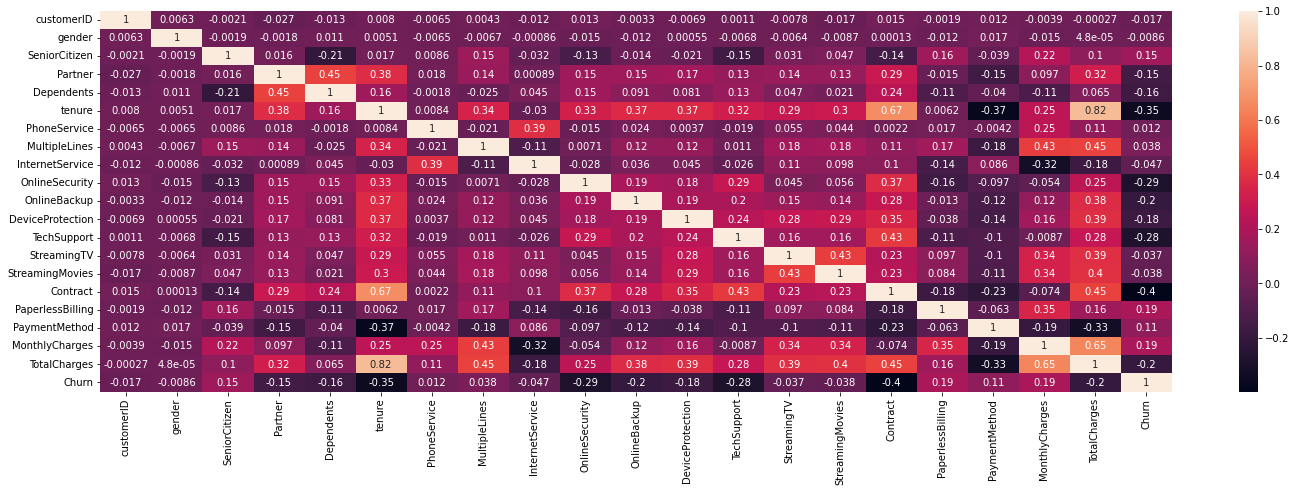

In [49]:
plt.figure(figsize=(24,7))
sns.heatmap(df.corr(), annot=True)

Observation:From the heatmap above we can see that there is no visible correlation between one another except Dependents & Partners.

However, lets reconfirm by calculating the Variance Inflation Factor(VIF)

#Checking the columns which are positively & negatively correlated with Label column

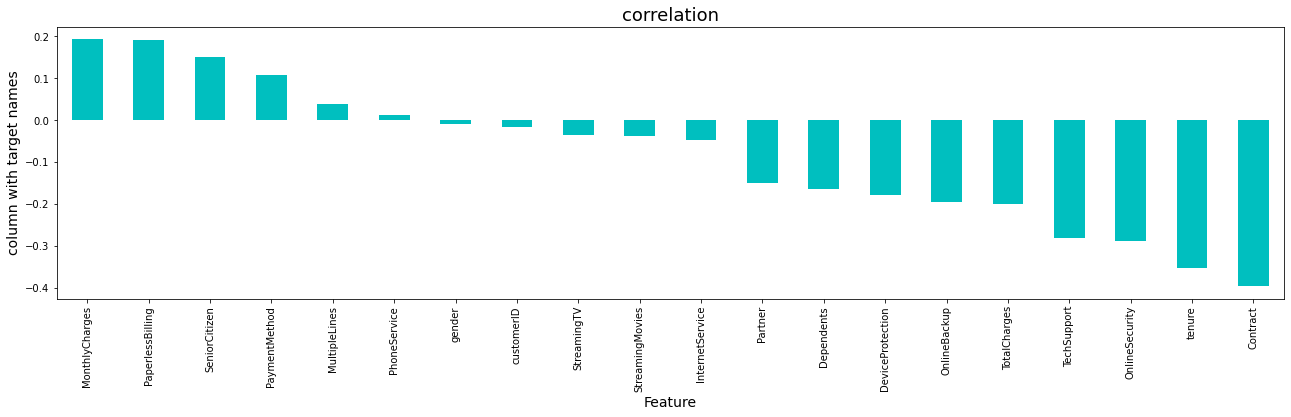

In [50]:
plt.figure(figsize=(22,5))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar', color="c")
plt.xlabel("Feature",fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [51]:
#checking for correlation between each feature and Label
df.corr()['Churn'].sort_values()

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
TotalCharges       -0.199428
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
customerID         -0.017447
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

In [52]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

We will keep +/-0.5 as the range for skewness. The columns which does not lie within the range are
    -  SeniorCitizen(categorical)
    -  Dependents(categorical)
    -  PhoneService(categorical)
    -  Contract(categorical)
    -  TotalCharges
    -  Churn(Target Variable)

Since its the categorically columns which are skewed we wil not treat it.

Variance Inflation Factor(VIF)
To solve this multicollinearity problem, we have to first scale our data using Standard Scaler

In [99]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Splitting the data 

In [100]:
x=df.iloc[:,0:-1]
x.shape

(7043, 20)

In [101]:
y=df.iloc[:,-1]
y.shape

(7043,)

In [102]:
from sklearn.preprocessing import MinMaxScaler

In [103]:
mns=MinMaxScaler()

In [104]:
#transforming dataset into a standard normal distribution

x_scaled = mns.fit_transform(x)
x_scaled

array([[0.76327748, 0.        , 0.        , ..., 0.66666667, 0.11542289,
        0.0012751 ],
       [0.56262425, 1.        , 0.        , ..., 1.        , 0.38507463,
        0.21586661],
       [0.36410111, 1.        , 0.        , ..., 1.        , 0.35422886,
        0.01031041],
       ...,
       [0.47813121, 0.        , 0.        , ..., 0.66666667, 0.11293532,
        0.03780868],
       [0.84265834, 1.        , 1.        , ..., 1.        , 0.55870647,
        0.03321025],
       [0.31610338, 1.        , 0.        , ..., 0.        , 0.86965174,
        0.78764136]])

In [106]:
x_scaled.shape

(7043, 20)

In [108]:
#initializing...creating an empty dataframe stored in vif
vif=pd.DataFrame()

In [109]:
vif['vif']=[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]

In [110]:
vif['Features'] = x.columns
vif

,vif,Features
0,3.637729,customerID
1,1.951264,gender
2,1.365517,SeniorCitizen
3,2.819662,Partner
4,1.964651,Dependents
5,16.192794,tenure
6,13.774028,PhoneService
7,2.724549,MultipleLines
8,4.384265,InternetService
9,2.267135,OnlineSecurity


Checking for Outliers

<AxesSubplot:xlabel='SeniorCitizen'>

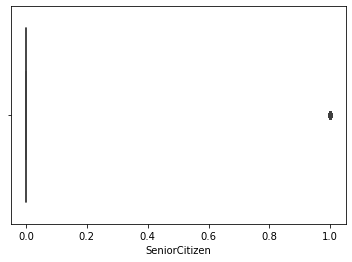

In [113]:
sns.boxplot(df['SeniorCitizen'])

<AxesSubplot:xlabel='tenure'>

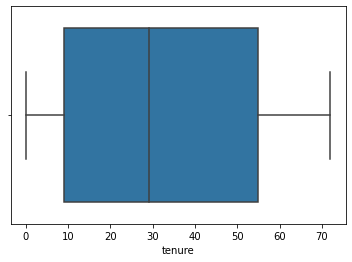

In [114]:
sns.boxplot(df['tenure'])

<AxesSubplot:xlabel='MonthlyCharges'>

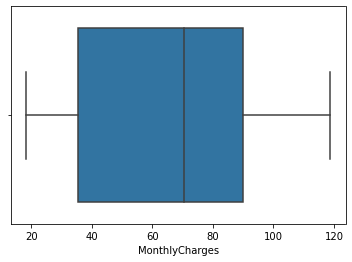

In [115]:
sns.boxplot(df['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges'>

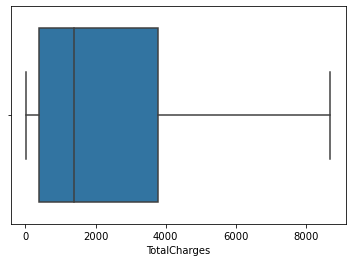

In [116]:
sns.boxplot(df['TotalCharges'])

There doesnt seem to be any outliers. But we will do the zscore and confirm.

In [117]:
import scipy.stats
from scipy.stats import zscore

In [118]:
zscore(df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.911890,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,...,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-0.994971,-0.601023
1,0.216906,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,...,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,-0.173876,-0.601023
2,-0.470701,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,...,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-0.960399,1.663829
3,0.990587,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,...,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,-0.195400,-0.601023
4,1.470632,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,...,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-0.941193,1.663829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.655145,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,...,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,-0.129281,-0.601023
7039,-0.981733,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,...,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,2.242808,-0.601023
7040,-0.075745,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,...,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.855182,-0.601023
7041,1.186835,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,...,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.872777,1.663829


In [119]:
z=np.abs(zscore(df))
z

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.911890,1.009559,0.439916,1.034530,0.654012,1.277445,3.054010,0.062723,1.183234,0.918838,...,1.027910,0.925262,1.113495,1.121405,0.828207,0.829798,0.398558,1.160323,0.994971,0.601023
1,0.216906,0.990532,0.439916,0.966622,0.654012,0.066327,0.327438,0.991588,1.183234,1.407321,...,1.245111,0.925262,1.113495,1.121405,0.371271,1.205113,1.334863,0.259629,0.173876,0.601023
2,0.470701,0.990532,0.439916,0.966622,0.654012,1.236724,0.327438,0.991588,1.183234,1.407321,...,1.027910,0.925262,1.113495,1.121405,0.828207,0.829798,1.334863,0.362660,0.960399,1.663829
3,0.990587,0.990532,0.439916,0.966622,0.654012,0.514251,3.054010,0.062723,1.183234,1.407321,...,1.245111,1.396299,1.113495,1.121405,0.371271,1.205113,1.474052,0.746535,0.195400,0.601023
4,1.470632,1.009559,0.439916,0.966622,0.654012,1.236724,0.327438,0.991588,0.172250,0.918838,...,1.027910,0.925262,1.113495,1.121405,0.828207,0.829798,0.398558,0.197365,0.941193,1.663829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.655145,0.990532,0.439916,1.034530,1.529024,0.340876,0.327438,1.117034,1.183234,1.407321,...,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.129281,0.601023
7039,0.981733,1.009559,0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,0.918838,...,1.245111,0.925262,1.146547,1.138411,0.371271,0.829798,0.537747,1.277533,2.242808,0.601023
7040,0.075745,1.009559,0.439916,1.034530,1.529024,0.870241,3.054010,0.062723,1.183234,1.407321,...,1.027910,0.925262,1.113495,1.121405,0.828207,0.829798,0.398558,1.168632,0.855182,0.601023
7041,1.186835,0.990532,2.273159,1.034530,0.654012,1.155283,0.327438,1.117034,0.172250,0.918838,...,1.027910,0.925262,1.113495,1.121405,0.828207,0.829798,1.334863,0.320338,0.872777,1.663829


In [120]:
#checking datashape of z
z.shape

(7043, 21)

In [121]:
threshold =3
np.where(z>3)
len(np.where(z>3)[0])

682

In [122]:
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

Observation: As almost all the outliers are in the 6th indexed column which is a categorical column we will not be going ahead with removal of outlier.

In [123]:
df.PhoneService.unique()

array([0., 1.])

In [124]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [125]:
#checking skewness
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

In [132]:
df.Churn.value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

as the output column Churn is imbalanced we will use SMOTE and balance it


In [145]:
from imblearn.over_sampling import SMOTE

In [146]:
smt=SMOTE()

In [147]:
#x,y are the inputs inside smote to create artificial rows
#trainx & trainy are givng the new rows
trainx,trainy=smt.fit_resample(x_scaled,y)

In [148]:
trainy.value_counts()

0.0    5174
1.0    5174
Name: Churn, dtype: int64

Model Selection

Logistic Regression

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import cross_val_score

In [150]:
lr=LogisticRegression()

In [151]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=.20)

In [152]:
lr.fit(x_train,y_train)

LogisticRegression()

In [153]:
pred=lr.predict(x_test)
pred

array([1., 0., 0., ..., 0., 0., 0.])

In [154]:
acc_lr=(accuracy_score(y_test,pred))
acc_lr

0.7980676328502415

In [155]:
confusion_matrix(y_test,pred)

array([[811, 259],
       [159, 841]], dtype=int64)

<AxesSubplot:>

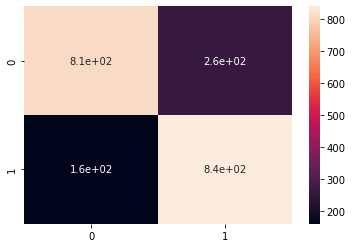

In [156]:
cf=confusion_matrix(y_test,pred)
sns.heatmap(cf,annot=True)

In [157]:
cl_report=classification_report(y_test,pred)
print(cl_report)

              precision    recall  f1-score   support

         0.0       0.84      0.76      0.80      1070
         1.0       0.76      0.84      0.80      1000

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



Checking for overfitting in Logistic Regression model.

Cross Validation of Logistic Regression

In [158]:
from sklearn.model_selection import cross_val_score

In [159]:
scr=cross_val_score(lr,x,y,cv=5)
print(scr)
lrcv_scr=round(scr.mean(),2)
print(round(scr.std()),2)
print("The cv score for Linear Regression:",lrcv_scr)

[0.8105039  0.79843861 0.78708304 0.79971591 0.80255682]
0 2
The cv score for Linear Regression: 0.8


Gaussian Naive Bayes

In [161]:
from sklearn.naive_bayes import GaussianNB

In [162]:
gb=GaussianNB()

In [163]:
gb.fit(x_train,y_train)

GaussianNB()

In [164]:
pred=gb.predict(x_test)
pred

array([1., 1., 0., ..., 1., 0., 0.])

In [165]:
acc_gb=round(accuracy_score(y_test,pred),2)
acc_gb

0.79

In [166]:
confusion_matrix(y_test,pred)
cf=confusion_matrix(y_test,pred)
cf

array([[795, 275],
       [163, 837]], dtype=int64)

              precision    recall  f1-score   support

         0.0       0.83      0.74      0.78      1070
         1.0       0.75      0.84      0.79      1000

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



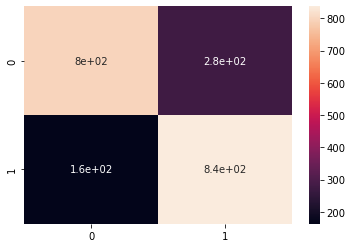

In [167]:
sns.heatmap(cf,annot=True)
print(classification_report(y_test,pred))

Cross validation of Gaussian Naive Bayes

In [170]:
gb_scr=cross_val_score(gb,x,y,cv=5)
print(gb_scr)
gb_cv_scr=round(gb_scr.mean(),2)
print(round(gb_scr.std()),2)
print("The cv score for Gaussian Naive Bayes:",gb_cv_scr)

[0.75372605 0.75727466 0.74095103 0.76207386 0.75497159]
0 2
The cv score for Gaussian Naive Bayes: 0.75


Decision Tree Classifier

In [171]:
from sklearn.tree import DecisionTreeClassifier

In [172]:
dtc=DecisionTreeClassifier()

In [173]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [174]:
pred=dtc.predict(x_test)
pred

array([0., 1., 0., ..., 0., 0., 0.])

In [175]:
acc_dtc=round(accuracy_score(y_test,pred),2)
acc_dtc

0.79

In [176]:
confusion_matrix(y_test,pred)

array([[837, 233],
       [205, 795]], dtype=int64)

<AxesSubplot:>

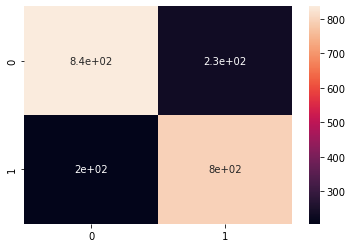

In [177]:
cf=confusion_matrix(y_test,pred)
sns.heatmap(cf,annot=True)

In [178]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79      1070
         1.0       0.77      0.80      0.78      1000

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



Cross Validation of Decision Tree Classifier

In [179]:
dtc_scr=cross_val_score(dtc,x,y,cv=5)
print(dtc_scr)
dtc_cv_scr=round(dtc_scr.mean(),2)
print(round(dtc_scr.std()),2)
print("The cv score for Decision Tree:",dtc_cv_scr)

[0.72888573 0.74520937 0.70972321 0.72230114 0.74715909]
0 2
The cv score for Decision Tree: 0.73


Random Forest

In [181]:
from sklearn.ensemble import RandomForestClassifier

In [182]:
rf=RandomForestClassifier()

In [183]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [184]:
pred=rf.predict(x_test)
pred


array([1., 0., 0., ..., 0., 0., 0.])

In [185]:
acc_rf=round(accuracy_score(y_test,pred),2)
acc_rf

0.87

In [186]:
confusion_matrix(y_test,pred)
cf=confusion_matrix(y_test,pred)
cf

array([[914, 156],
       [117, 883]], dtype=int64)

              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87      1070
         1.0       0.85      0.88      0.87      1000

    accuracy                           0.87      2070
   macro avg       0.87      0.87      0.87      2070
weighted avg       0.87      0.87      0.87      2070



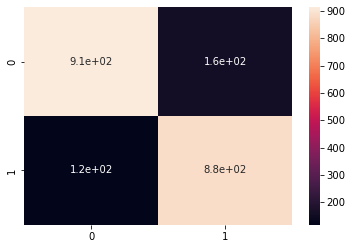

In [187]:
sns.heatmap(cf,annot=True)
print(classification_report(y_test,pred))

Cross validation of Random Forest

In [188]:
rf_scr=cross_val_score(rf,x,y,cv=5)
print(rf_scr)
rf_cv_scr=round(rf_scr.mean(),2)
print(round(rf_scr.std()),2)
print("The cv score for Random Forest:",rf_cv_scr)

[0.80340667 0.80553584 0.77217885 0.79829545 0.80681818]
0 2
The cv score for Random Forest: 0.8


SGDClassifier

In [190]:
from sklearn.linear_model import SGDClassifier

In [191]:
sgd=SGDClassifier()

In [193]:
sgd.fit(x_train,y_train)

SGDClassifier()

In [194]:
predy=sgd.predict(x_test)
predy

array([1., 0., 0., ..., 1., 0., 0.])

In [196]:
sgd_acc=(accuracy_score(y_test,predy))
sgd_acc

1

In [197]:
confusion_matrix(y_test,pred)
cf=confusion_matrix(y_test,predy)
cf

array([[646, 424],
       [ 59, 941]], dtype=int64)

              precision    recall  f1-score   support

         0.0       0.92      0.60      0.73      1070
         1.0       0.69      0.94      0.80      1000

    accuracy                           0.77      2070
   macro avg       0.80      0.77      0.76      2070
weighted avg       0.81      0.77      0.76      2070



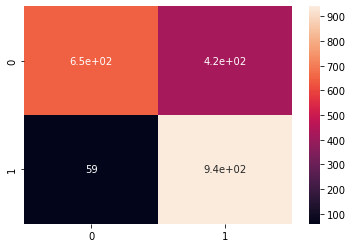

In [198]:
sns.heatmap(cf,annot=True)
print(classification_report(y_test,predy))

In [200]:
sgd_scr=cross_val_score(sgd,x,y,cv=5)
print(rf_scr)
sgd_cv_scr=round(sgd_scr.mean(),2)
print(round(sgd_scr.std()),2)
print("The cv score for SGD Classifier:",sgd_cv_scr)

[0.79701916 0.79418027 0.77146913 0.80255682 0.79900568]
0 2
The cv score for SGD Classifier: 0.7


In [201]:
#constructing a dataframe of the models used

Models=pd.DataFrame({'Ml_Models':['Logistic Regression','Gaussian Naive Bayes','Decision Tree Classifier','Random Forest','SGDClassifier'], 'Accuracy_Score':[acc_lr,acc_gb,acc_dtc,acc_rf,sgd_acc], 'Cross_Validation_Score':[lrcv_scr,gb_cv_scr,dtc_cv_scr,rf_cv_scr,sgd_cv_scr]})
Models

,Ml_Models,Accuracy_Score,Cross_Validation_Score
0,Logistic Regression,0.798068,0.80
1,Gaussian Naive Bayes,0.790000,0.75
2,Decision Tree Classifier,0.790000,0.73
3,Random Forest,0.870000,0.79
4,SGDClassifier,1.000000,0.70


We will be taking Random Forest classifier as the best model as the Cross validation score is the maximum for this model.

Hyper Parameter tunning

In [202]:
from sklearn.model_selection import GridSearchCV

In [203]:
rf=RandomForestClassifier()

In [204]:
parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
            'criterion' :['gini', 'entropy'],
            'n_estimators':[100,200,300,400,500]}

In [205]:
GSV=GridSearchCV(rf,parameters,cv=5)

In [206]:
GSV.fit(x_train,y_train)
GSV.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [207]:
GSV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='auto',
                       n_estimators=500)

In [208]:
GCV_pred=GSV.best_estimator_.predict(x_test)#predicting with the best parameter
accuracy_score(y_test,GCV_pred)#checking final accuracy

0.8463768115942029

ROC AUC plot

In [209]:
from sklearn.metrics import plot_roc_curve

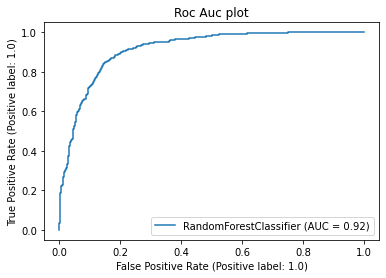

In [210]:
plot_roc_curve(GSV.best_estimator_,x_test,y_test)
plt.title("Roc Auc plot")
plt.show()

Model Saving

In [211]:
import pickle

In [212]:
filename='ML_Cust_churn'
pickle.dump(rf,open(filename,'wb'))